### 数据爬取和保存

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import datetime
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [6]:
# 东方财富、安诺其、世纪天鸿、星环科技、榕基软件
name_list=['东方财富','安诺其','世纪天鸿','星环科技','榕基软件']
url_list=['https://quote.eastmoney.com/','https://quote.eastmoney.com/sz300067.html','https://quote.eastmoney.com/sz300654.html','https://quote.eastmoney.com/kcb/688031.html','https://quote.eastmoney.com/sz002474.html']

In [4]:
driver=webdriver.Chrome()
result=pd.DataFrame([{'最新价格':'','股票名称':'','date':''}])
result=result.drop([0])
for j in range(90):
    for i in range(5):
        driver.get(url_list[i])
        price = driver.find_element(By.CLASS_NAME,'zxj')
        new=price.text
        name=name_list[i]
        current_time=datetime.datetime.now()
        date1=current_time.strftime("%d/%m/%Y, %H:%M:%S")
        df=pd.DataFrame([{'最新价格':new,'股票名称':name,'date':date1}])
        result=pd.concat([result,df],ignore_index=True)
    time.sleep(10)
result

,最新价格,股票名称,date
0,12.94,东方财富,"27/03/2024, 13:01:30"
1,4.91,安诺其,"27/03/2024, 13:01:31"
2,11.88,世纪天鸿,"27/03/2024, 13:01:31"
3,53.24,星环科技,"27/03/2024, 13:01:32"
4,5.90,榕基软件,"27/03/2024, 13:01:32"
...,...,...,...
445,12.91,东方财富,"27/03/2024, 13:20:57"
446,4.95,安诺其,"27/03/2024, 13:20:57"
447,12.54,世纪天鸿,"27/03/2024, 13:20:58"
448,52.64,星环科技,"27/03/2024, 13:20:58"


In [8]:
result=result.iloc[0:350,:]
result['最新价格']=result['最新价格'].astype(float).round(2)
result['date']=pd.to_datetime(result['date'])

In [18]:
result.to_csv("try2.csv")

In [ ]:
result=pd.read_csv('try2.csv')

### 画图，横坐标为时间（以初始爬取时刻为0s开始计算）

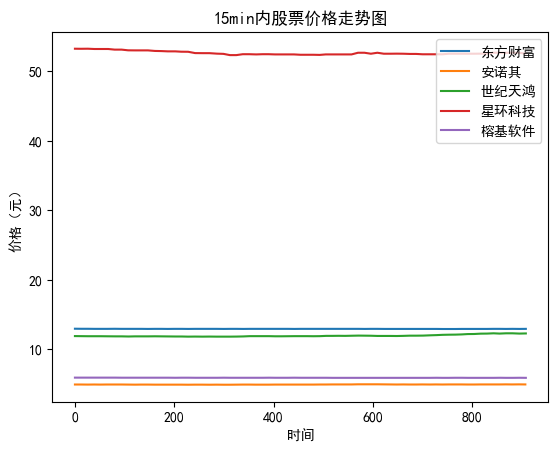

In [9]:
for name in name_list:
    data=result[result['股票名称']==name]
    data['date']=data['date'].apply(lambda x: (x - datetime.datetime(1970, 1, 1)).total_seconds())
    data['date']-=data['date'].iloc[0]
    data=data[['最新价格','date']]
    x=data['date']
    y=data['最新价格']
    plt.plot(x,y,label=name,)
plt.xlabel('时间')  # x 轴标签
plt.ylabel('价格（元）')  # y 轴标签
plt.title('15min内股票价格走势图')  # 图形标题
# 添加图例
plt.legend(loc='upper right')
# 显示图形
plt.show()

### 五个曲线在一个图上的话看不出明显波动，故分别画图

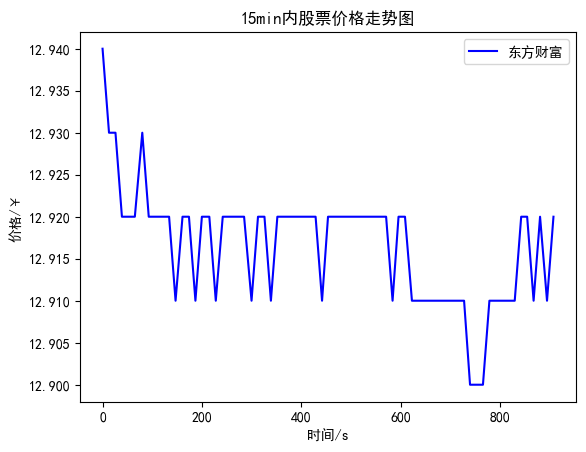

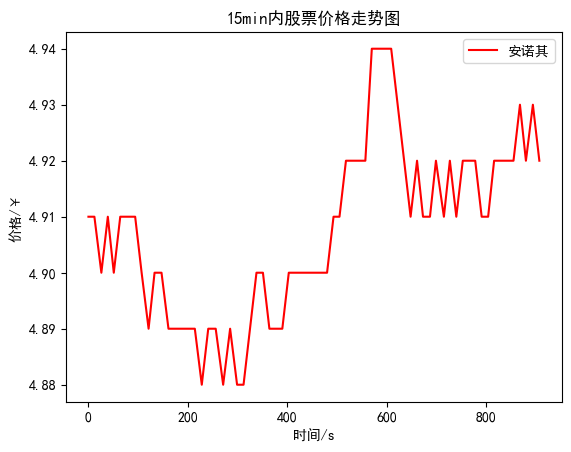

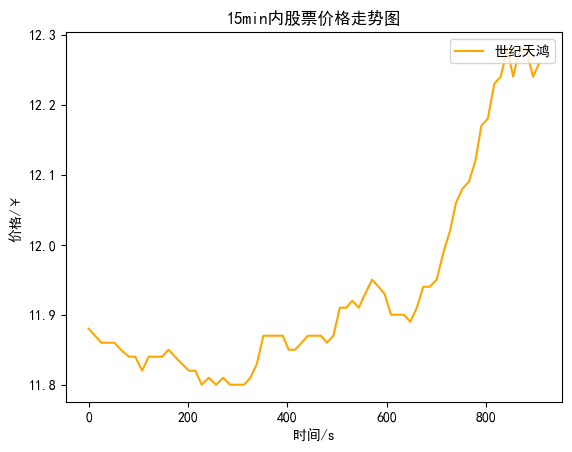

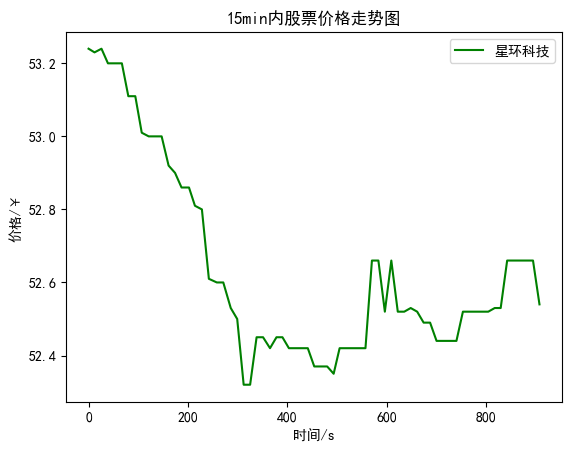

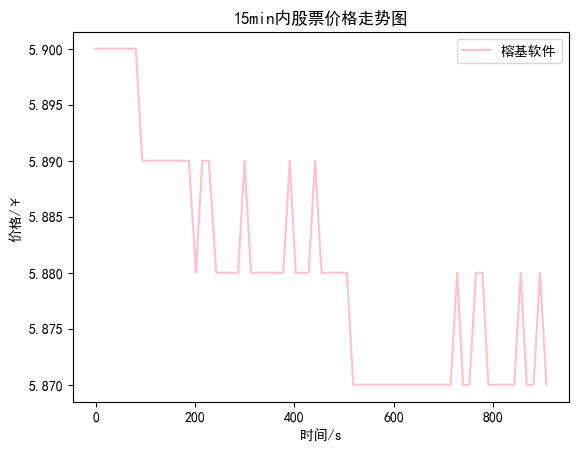

In [10]:
color1=['blue','red','orange','green','pink']
i=1
for name in name_list:
    data=result[result['股票名称']==name]
    data['date']=data['date'].apply(lambda x: (x - datetime.datetime(1970, 1, 1)).total_seconds())
    data['date']-=data['date'].iloc[0]
    data=data[['最新价格','date']]
    x=data['date']
    y=data['最新价格']
    plt.figure()
    plt.plot(x,y,label=name,color=color1[i-1])
    # 添加轴标签和标题
    plt.xlabel('时间/s')  # x 轴标签
    plt.ylabel('价格/￥')  # y 轴标签
    plt.title('15min内股票价格走势图')  # 图形标题
    # 添加图例
    plt.legend(loc='upper right')
    i+=1
plt.show()

### 实验内容解释
由于股票价格是用`JavaScript`动态展示的，故本次实验我选择python的`selenum`库进行信息爬取，首先在东方财富网上选择5支股票的对应网页，用`selenum`
每隔10s记录一次股票价格信息，持续15min，获得五只股票在15min的价格数据，并将其保存到.csv文件中

之后进行图形的绘制，由于日期时间不太方便展示，将其转换为秒的形式，并以开始爬虫的时间（27/03/2024, 13:01:30）为0s的起始点，这样展示股票价格随时间的变动更加直观。纵坐标则为股票价格，通过15min内股票的价格变动图可以看出不同股票的价格变动趋势各不相同，有些呈上涨趋势，有些则下降较为明显。